In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### &#11088; Visualisierung der Daten

### &#11088; Funktionen für die Visualisierung und Plotting

In [2]:
def Datensatz(CSVdatei):
    data = pd.read_csv(CSVdatei, delimiter= ";")
    return data
    

**Ringe** 

Die Funktion Ringe macht es, dass ein Datensatz eingelesen wird und dann ein Pie Chart ausgibt, welcher anzeigt welcher Ring am öftesten getroffen wurde.

In [3]:
def Ringe(Datensatz):
    try:
        Ring= Datensatz["Ringe"].value_counts()
    except: 
        print ("Dataframe ist kein Arrow Dataframe oder hat keine Spalte namens 'Ringe'")
    return Ring.plot.pie(figsize= (3,3), ylabel = "Treffer", xlabel = "",legend= True)

**Zielscheibe**

Die Funktion Zielscheibe macht es, dass ein Datensatz eingelesen wird und dann ein Scatterplot erstellt wird. 
Das besondere an der Funktion ist, dass der Plot auch anzeigt wo genau der Pfeil, in der Zielscheibe getroffen hat.

In [4]:
def Zielscheibe (Datensatz):
        if Datensatz["Typ Auflage"].max() == 122:

            Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 1, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280), zorder = 6)

            c11 = plt.Circle((0,0), 61, alpha = 0.5, color = 'yellow', zorder = 5)         # 10 Punkte
            c12 = plt.Circle((0,0), 118, alpha = 0.7, color = 'yellow', zorder = 4)        # 9 Punkte
            c13 = plt.Circle((0,0), 162, alpha = 0.3, color = 'red', zorder = 3)           # 8 Punkte
            c14 = plt.Circle((0,0), 217, alpha = 0.6, color = 'red', zorder = 2)           # 7 Punkte
            c15 = plt.Circle((0,0), 268, alpha = 1.0, color = 'lightblue', zorder = 1)     # 6 Punkte

            for l in [c11, c12, c13, c14, c15]:
                Plot.add_patch(l)
        
        elif Datensatz["Typ Auflage"].max() == 40:

            Plot= Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 4,xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-140,140), ylim= (-140,140), zorder = 8) 

            c31 = plt.Circle((0,0), 21, alpha = 0.5, color = 'yellow', zorder = 7)     # 10 Punkte       
            c32 = plt.Circle((0,0), 41, alpha = 0.7, color = 'yellow', zorder = 6)     # 9 Punkte
            c33 = plt.Circle((0,0), 59, alpha = 0.3, color = 'red', zorder = 5)        # 8 Punkte
            c34 = plt.Circle((0,0), 73, alpha = 0.6, color = 'red', zorder = 4)        # 7 Punkte
            c35 = plt.Circle((0,0), 91, alpha = 1.0, color = 'lightblue', zorder = 3)  # 6 Punkte
            c36 = plt.Circle((0,0), 118, alpha = 0.9, color = 'lightblue', zorder = 2) # 5 Punkte
            c37 = plt.Circle((0,0), 137, alpha = 0.8, color = 'black', zorder = 1)     # 4 Punkte

            for l in [c31, c32, c33, c34, c35, c36, c37]:
                Plot.add_patch(l)
        
        else: print ("Der Datensatz erhält keine Standardwerte für Typauflage")
        return Plot


**Treffer vergleiche zur Passe**

Soll zeigen ob es eine Rolle spiel wie lange man schon spielt. Das macht die Funktion indem Sie Passe und Treffer in mehrere Graphen steckt kommt drauf an wie viele spiele man schon gespielt hat.

In [5]:
def Trefferpassequote(a1= 0, a2= 0 , a3= 0 , a4= 0 ):

    try:
        Ringe1 = a1["Ringe"]

        Ringe2 = a2["Ringe"]

        Ringe3 = a3["Ringe"]

        Ringe4 = a4["Ringe"]

        fig, (ax, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize = (5,5), sharex= True,sharey= True)

        ax.plot(Ringe1, color = "red")
        ax2.plot(Ringe2, color = "lightblue")
        ax3.plot(Ringe3, color = "black")
        ax4.plot(Ringe4, color = "purple")
        ax4.set_xlabel("Passe")
        ax3.set_ylabel("durchschnittliche")
        ax2.set_ylabel("Punkte")
      
    except: print("Die Funktion braucht 4 Datensätze")

In [6]:
def AveragePunkteProPasse(Datensätze):

    averageliste=[]
    
    for l in range(1,Datensätze["Passe"].max()):

        new = Datensätze[Datensätze["Passe"] == l]

        sum = 0 
        try:
            for i in new["Ringe"]:
                sum = sum + i

            average = sum/new["Ringe"].count()
            averageliste.append(average)
        except: 
            averageliste.append(0)
            
        series = pd.Series(averageliste)
        Dataframe = pd.DataFrame({"Ringe": series.values})
        
    return Dataframe

In [7]:
arrows1 = Datensatz("arrows1.csv")
arrows2 = Datensatz("arrows2.csv")
arrows3 = Datensatz("arrows3.csv")
arrows4 = Datensatz("arrows4.csv")

&#11088; Einsicht der Plots

C:\Users\gamer\AppData\Local\Temp\ipykernel_19468\2711708104.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 1, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280), zorder = 6)


<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

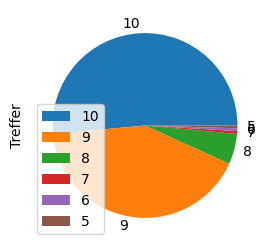

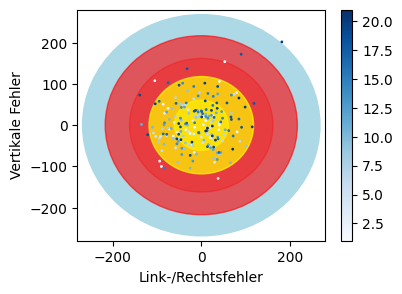

In [8]:
#Vergleich zweiter Datensatz
Ringe(arrows2)
Zielscheibe(arrows2)

C:\Users\gamer\AppData\Local\Temp\ipykernel_19468\2711708104.py:17: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  Plot= Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 4,xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-140,140), ylim= (-140,140), zorder = 8)


<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

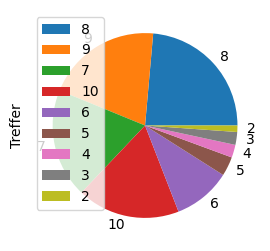

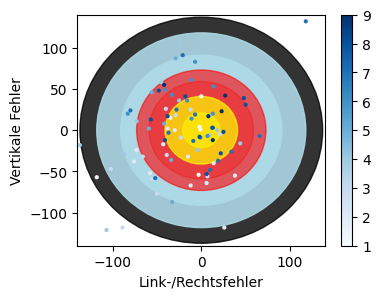

In [9]:
#Vergleich dritter Datensatz
Ringe(arrows3)
Zielscheibe(arrows3)

C:\Users\gamer\AppData\Local\Temp\ipykernel_19468\2711708104.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 1, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280), zorder = 6)


<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

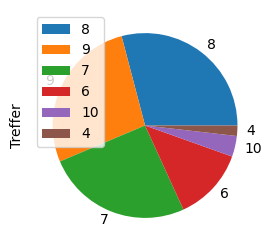

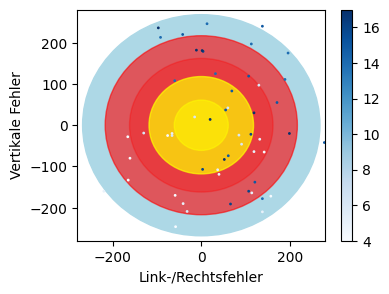

In [10]:
#Vergleich vierter Datensatz
Ringe(arrows4)
Zielscheibe(arrows4)

C:\Users\gamer\AppData\Local\Temp\ipykernel_19468\3936192681.py:14: RuntimeWarning: invalid value encountered in scalar divide
  average = sum/new["Ringe"].count()


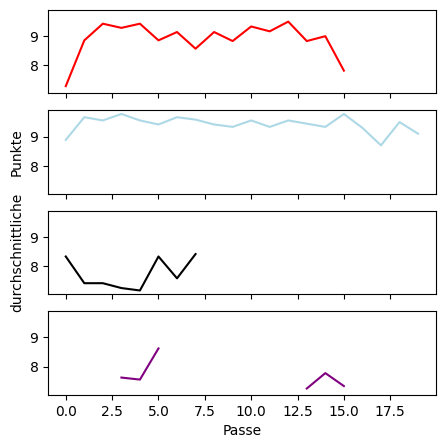

In [11]:
Trefferpassequote(AveragePunkteProPasse(arrows1),AveragePunkteProPasse(arrows2),AveragePunkteProPasse(arrows3),AveragePunkteProPasse(arrows4))

### &#11088; Interaktive Grafik

In [12]:
from ipywidgets import interact
import ipywidgets as widgets

In [14]:
def intgraf(Data, Passe):

    if Data == 1:
        data = Datensatz("arrows1.csv")
    elif Data == 2:
        data = Datensatz("arrows2.csv")
    elif Data == 3:
        data = Datensatz("arrows3.csv")
    else:
        data = Datensatz("arrows4.csv")

    data = data[data["Passe"] == Passe]

    if data["Typ Auflage"].max() == 122:
        plot = data.plot.scatter(x="x", y="y", figsize=(3, 3), s=1, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, xlim=(-280, 280), ylim=(-280, 280), zorder=6)

        c11 = plt.Circle((0, 0), 61, alpha=0.5, color='yellow', zorder=5)         # 10 Punkte
        c12 = plt.Circle((0, 0), 118, alpha=0.7, color='yellow', zorder=4)        # 9 Punkte
        c13 = plt.Circle((0, 0), 162, alpha=0.3, color='red', zorder=3)           # 8 Punkte
        c14 = plt.Circle((0, 0), 217, alpha=0.6, color='red', zorder=2)           # 7 Punkte
        c15 = plt.Circle((0, 0), 268, alpha=1.0, color='lightblue', zorder=1)     # 6 Punkte

        for l in [c11, c12, c13, c14, c15]:
            plot.add_patch(l)
        
    elif data["Typ Auflage"].max() == 40:
        plot = data.plot.scatter(x="x", y="y", figsize=(3, 3), s=4, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, xlim=(-140, 140), ylim=(-140, 140), zorder=8) 

        c31 = plt.Circle((0, 0), 21, alpha=0.5, color='yellow', zorder=7)     # 10 Punkte       
        c32 = plt.Circle((0, 0), 41, alpha=0.7, color='yellow', zorder=6)     # 9 Punkte
        c33 = plt.Circle((0, 0), 59, alpha=0.3, color='red', zorder=5)        # 8 Punkte
        c34 = plt.Circle((0, 0), 73, alpha=0.6, color='red', zorder=4)        # 7 Punkte
        c35 = plt.Circle((0, 0), 91, alpha=1.0, color='lightblue', zorder=3)  # 6 Punkte
        c36 = plt.Circle((0, 0), 118, alpha=0.9, color='lightblue', zorder=2) # 5 Punkte
        c37 = plt.Circle((0, 0), 137, alpha=0.8, color='black', zorder=1)     # 4 Punkte

        for l in [c31, c32, c33, c34, c35, c36, c37]:
            plot.add_patch(l)
        
    else:
        print("Der Datensatz erhält keine Standardwerte für Typauflage")
    return plot


interact(intgraf, Data=[1, 2, 3, 4], Passe=(1, 17, 1))


interactive(children=(Dropdown(description='Data', options=(1, 2, 3, 4), value=1), IntSlider(value=9, descript…

<function __main__.intgraf(Data, Passe)>

### &#11088; Mittelwert & Standardabweichung

In [25]:
def Mittelwert(Datensatz):
    xsum = 0
    for i in Datensatz["x"]:
        xsum = xsum + i
    xmw = xsum / len(Datensatz["x"])
  

    ysum = 0
    for i in Datensatz["y"]:
         ysum = ysum + i
    ymw = ysum / len(Datensatz["y"])

    return xmw, ymw


In [16]:
def Standardwert(Datensatz):
    xstd = Datensatz["x"].std()
    ystd = Datensatz["y"].std()

    return xstd,ystd

In [21]:
#Mittelwerte und Streuung erster Datensatz
print("Mittelwerte:", Mittelwert(arrows1))
print("Streuungen:", Standardwert(arrows1))

Mittelwerte: (-7.8429752066115705, 25.537190082644628)
Streuungen: (80.17626501075227, 93.37648181084947)


In [22]:
#Mittelwerte und Streuung zweiter Datensatz
print("Mittelwerte:", Mittelwert(arrows2))
print("Streuungen:", Standardwert(arrows2))

Mittelwerte: (-9.242718446601941, 2.5679611650485437)
Streuungen: (59.77485661468129, 52.699078926726166)


In [23]:
#Mittelwerte und Streuung dritter Datensatz
print("Mittelwerte:", Mittelwert(arrows3))
print("Streuungen:", Standardwert(arrows3))

Mittelwerte: (-19.415730337078653, -2.337078651685393)
Streuungen: (42.312906098162415, 47.204329496211734)


In [24]:
#Mittelwerte und Streuung vierter Datensatz
print("Mittelwerte:", Mittelwert(arrows4))
print("Streuungen:", Standardwert(arrows4))

Mittelwerte: (35.18181818181818, -1.0727272727272728)
Streuungen: (109.07321545625366, 145.26959032107814)
